# __PyMC3__
<img src="pics/Pymc3_banner.svg" alt="Drawing" style="width: 300px;" align='right'>

## __Probabilistic computation with Python__

### __Columbia Python User Group__, Tue 11.29.2021

_Roger Creel_ 




notebook: [on github](https://github.com/rcameronc/pymc3_pythonusergroup/)

# __PyMC3__

__Documentation__:    https://docs.pymc.io/

__Repository__: https://github.com/pymc-devs/pymc3

__Initial release__: [PyMC3 v3.0.rc3_full (Dec 1, 2016)](https://github.com/pymc-devs/pymc3/releases/tag/v3.0.rc3_full)  

<img src="pics/NumFocus_LRG.png" alt="Drawing" style="width: 300px;" align='right'>


__Latest release__:  [PyMC3 v3.11.4 (August 20, 2021)](https://github.com/pymc-devs/pymc/releases/tag/v3.11.4)  


__contributors: 100__ 

__Umbrellas:__ <u>[NumFOCUS](https://numfocus.org/)</u> _(but no funding)_


# What is Bayesian Inference?


# $$P(H | E) = \frac{P(E | H) P(H)}{P(E)}$$


<img src="pics/bayesian_inference_example.png" alt="Drawing" style="width: 1500px"  align='center'>


<img src="pics/bayesian_cloud.png" alt="Drawing" style="width: 1500px"  align='center'>


<img src="pics/icesheet.png" alt="Drawing" style="width: 1500px"  align='center'>


<img src="pics/icesheet_house.png" alt="Drawing" style="width: 1500px"  align='center'>


<img src="pics/skidoo.png" alt="Drawing" style="width: 1500px"  align='center'>


# **Why should you care?**

## Common Problems in science

* Not enough data 
* Too much data
* Don't know how confident we are in results 
* Don't know how to interpret results

<video controls src="video/Ross Sea Ice and Salinity.mp4" alt="Drawing" style="width: 1500px"  align='center'>


<img src="pics/interpolate.png" alt="Drawing" style="width: 1500px"  align='center'>


## __Bayesian Inference__

* natively incorporates the idea of confidence 
* performs well with sparse data
* Models and results are highly interpretable and easy to understand

# __Key Terminology__

## __Bayesian Inference__


   * prior
   
   * posterior
    
   * expectation _vs._ estimate
      
   * uncertainty _vs._ noise
   
   * likelihood

## __Bayesian Inference__

   * prior _vs._ posterior
    
   * expectation _vs._ estimate
      
   * uncertainty _vs._ noise
   
   * likelihood

## __Object oriented Programming__

   * a class is a blueprint for creating objects.  
   
   * objects are instances of a class.
   
   * an object is a data field that has unique attributes and behavior.
   
   * An object's behaviors are represented as methods
   

<img src="pics/oop.png" alt="Drawing" style="width: 1500px"  align='center'>


## __Python Lingo__
   
  

   * numpy : library for multi-dimensional array-based computation (written in python & C)

   * matplotlib : base plotting library

   
   * Theano : library and optimizing compiler for manipulating and evaluating matrices. 

   
   * tensor : algebraic object that describes a (multilinear) relationship between sets of algebraic objects related to a vector space
  

<img src="pics/tensor.png" alt="Drawing" style="width: 1500px"  align='center'>


   * arviz : library for exploratory analysis of Bayesian models

# Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import arviz as az

import pymc3 as pm
import theano.tensor as tt
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
%config InlineBackend.figure_format = 'retina'
az.style.use('arviz-darkgrid')
print('Running on PyMC3 v{}'.format(pm.__version__))
print('Running on ArviZ v{}'.format(az.__version__))

Running on PyMC3 v3.11.4
Running on ArviZ v0.11.4


# What do we mean by Probabilistic?


<img src="pics/Deterministic_probabilistic_comparison.jpg" alt="Drawing" style="width: 800px" align='center'>


In [3]:
# az.plot_posterior(np.random.randn(100_000));

# Why PyMC3?  

<img src="pics/normal.png" alt="Drawing" style="width: 800px" align='center'>


<img src="pics/complex_prob.png" alt="Drawing" style="width: 800px" align='center'>


### Markov Chain <span style="color:#D2D2D2"> Monte Carlo </span>

<img src="pics/markovchain.jpeg" alt="Drawing" style="width: 800px" align='center'>


### <span style="color:#D2D2D2"> Markov Chain  </span> Monte Carlo

<img src="gifs/montecarlo.gif" alt="Drawing" width="600" align="center">


### Markov Chain Monte Carlo 

[with Efficient No U Turn sampling](https://chi-feng.github.io/mcmc-demo/app.html?algorithm=NaiveNUTS&target=banana)


# PyMC3

## __1.  Model Creation__

Models in PyMC3 are centered around the Model class. It has references to all random variables (RVs) and computes the model log probability and its gradients. Usually, you would instantiate it as part of a _with_ context:

In [4]:
with pm.Model() as model:
    # Model definition
    pass

### As always, you can read an object's docstring with with a single question mark:

In [5]:
pm.Model?

### And you can read how a model is defined, docstring plus code, with two question marks:

In [6]:
pm.Model??

We discuss random variables further below, but let’s create a simple model to explore the Model class.

In [66]:
with pm.Model() as model:
    mu = pm.Normal("mu", mu=0, sigma=1)
    obs = pm.Normal("obs", mu=mu, sigma=1, observed=np.random.randn(100))

In [72]:
model

In [73]:
model.basic_RVs

[mu ~ Normal, obs ~ Normal]

In [68]:
model.free_RVs

[mu ~ Normal]

In [69]:
model.observed_RVs

[obs ~ Normal]

In [70]:
model.logp({"mu": 0})

array(-140.60369501)

It’s worth highlighting the design choice we made with logp. As you can see above, logp is being called with arguments, so it’s a method of the model instance. More precisely, it puts together a function based on the current state of the model – or on the state given as argument to logp (see example below).

For diverse reasons, we assume that a Model instance isn’t static. If you need to use logp in an inner loop and it needs to be static, simply use something like logp = model.logp. Here is an example below – note the caching effect and the speed up:

In [12]:
%timeit model.logp({mu: 0.1})
logp = model.logp
%timeit logp({mu: 0.1})

53.5 ms ± 1.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
16 µs ± 287 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)



__Terminology explanation__

Static = any choice made at development time, i.e., _before_ program execution


Dynamic = depends on choices and options that can be validated only at runtime, i.e., _during_ program execution

# __2. Probability Distributions__

Every probabilistic program consists of observed and unobserved Random Variables (RVs). 

Observed RVs are defined via likelihood distributions, while unobserved RVs are defined via prior distributions. 


In PyMC3, probability distributions are available from the main module space:

In [13]:
# equivalent to pm.Normal?
help(pm.Normal)

Help on class Normal in module pymc3.distributions.continuous:

class Normal(pymc3.distributions.distribution.Continuous)
 |  Normal(mu=0, sigma=None, tau=None, sd=None, **kwargs)
 |  
 |  Univariate normal log-likelihood.
 |  
 |  The pdf of this distribution is
 |  
 |  .. math::
 |  
 |     f(x \mid \mu, \tau) =
 |         \sqrt{\frac{\tau}{2\pi}}
 |         \exp\left\{ -\frac{\tau}{2} (x-\mu)^2 \right\}
 |  
 |  Normal distribution can be parameterized either in terms of precision
 |  or standard deviation. The link between the two parametrizations is
 |  given by
 |  
 |  .. math::
 |  
 |     \tau = \dfrac{1}{\sigma^2}
 |  
 |  .. plot::
 |  
 |      import matplotlib.pyplot as plt
 |      import numpy as np
 |      import scipy.stats as st
 |      plt.style.use('seaborn-darkgrid')
 |      x = np.linspace(-5, 5, 1000)
 |      mus = [0., 0., 0., -2.]
 |      sigmas = [0.4, 1., 2., 0.4]
 |      for mu, sigma in zip(mus, sigmas):
 |          pdf = st.norm.pdf(x, mu, sigma)
 |       

In the PyMC3 module, the structure for probability distributions looks like this:

In [14]:
dir(pm.distributions.mixture)

['Discrete',
 'Distribution',
 'Iterable',
 'Mixture',
 'MixtureSameFamily',
 'Normal',
 'NormalMixture',
 '_DrawValuesContext',
 '_DrawValuesContextBlocker',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_conversion_map',
 'all_discrete',
 'bound',
 'broadcast_distribution_samples',
 'draw_values',
 'generate_samples',
 'get_broadcastable_dist_samples',
 'get_tau_sigma',
 'logsumexp',
 'np',
 'random_choice',
 'take_along_axis',
 'theano',
 'to_tuple',
 'tt']

As you see, dir() is a built-in python method that returns all properties and methods of the specified object

## __Unobserved Random Variables__

Every unobserved RV has the following calling signature: name (str), parameter keyword arguments. Thus, a normal prior can be defined in a model context like this:

In [15]:
with pm.Model():
    x = pm.Normal("x", mu=0, sigma=1)

As with the model, we can evaluate its logp:



In [16]:
x.logp({"x": 0})

array(-0.91893853)

# __Observed Random Variables__

Observed RVs are defined just like unobserved RVs but require data to be passed into the observed keyword argument:



In [17]:
with pm.Model():
    obs = pm.Normal("x", mu=0, sigma=1, observed=np.random.randn(100))

observed supports lists, numpy.ndarray, theano and pandas data structures.

# __Deterministic transforms__¶


PyMC3 allows you to freely do algebra with RVs in all kinds of ways:

In [18]:
with pm.Model():
    x = pm.Normal("x", mu=0, sigma=1)
    y = pm.Gamma("y", alpha=1, beta=1)
    plus_2 = x + 2
    summed = x + y
    squared = x ** 2
    sined = pm.math.sin(x)

While these transformations work seamlessly, their results are not stored automatically. Thus, if you want to keep track of a transformed variable, you have to use pm.Deterministic:

In [19]:
with pm.Model():
    x = pm.Normal("x", mu=0, sigma=1)
    plus_2 = pm.Deterministic("x plus 2", x + 2)

Note that plus_2 can be used in the identical way to above, we only tell PyMC3 to keep track of this RV for us.

## Automatic transforms of bounded RVs¶


In order to sample models more efficiently, PyMC3 automatically transforms bounded RVs to be unbounded.

In [20]:
with pm.Model() as model:
    x = pm.Uniform("x", lower=0, upper=1)

When we look at the RVs of the model, we would expect to find x there, however:



In [21]:
model.free_RVs

[x_interval__ ~ TransformedDistribution]

x_interval__ represents x transformed to accept parameter values between -inf and +inf. In the case of an upper and a lower bound, a LogOdds transform is applied. Sampling in this transformed space makes it easier for the sampler. PyMC3 also keeps track of the non-transformed, bounded parameters. These are common determinstics (see above):

In [22]:
model.deterministics

[x ~ Uniform]

When displaying results, PyMC3 will usually hide transformed parameters. You can pass the include_transformed=True parameter to many functions to see the transformed parameters that are used for sampling.

You can also turn transforms off:





In [23]:
with pm.Model() as model:
    x = pm.Uniform("x", lower=0, upper=1, transform=None)

print(model.free_RVs)

[x ~ Uniform]


Or specify different transformation other than the default:



In [24]:
import pymc3.distributions.transforms as tr

with pm.Model() as model:
    # use the default log transformation
    x1 = pm.Gamma("x1", alpha=1, beta=1)
    # specify a different transformation
    x2 = pm.Gamma("x2", alpha=1, beta=1, transform=tr.log_exp_m1)

print("The default transformation of x1 is: " + x1.transformation.name)
print("The user specified transformation of x2 is: " + x2.transformation.name)

The default transformation of x1 is: log
The user specified transformation of x2 is: log_exp_m1


## Transformed distributions and changes of variables¶


PyMC3 does not provide explicit functionality to transform one distribution to another. Instead, a dedicated distribution is usually created in consideration of optimising performance. However, users can still create transformed distribution by passing the inverse transformation to transform kwarg. Take the classical textbook example of LogNormal: 𝑙𝑜𝑔(𝑦)∼Normal(𝜇,𝜎)

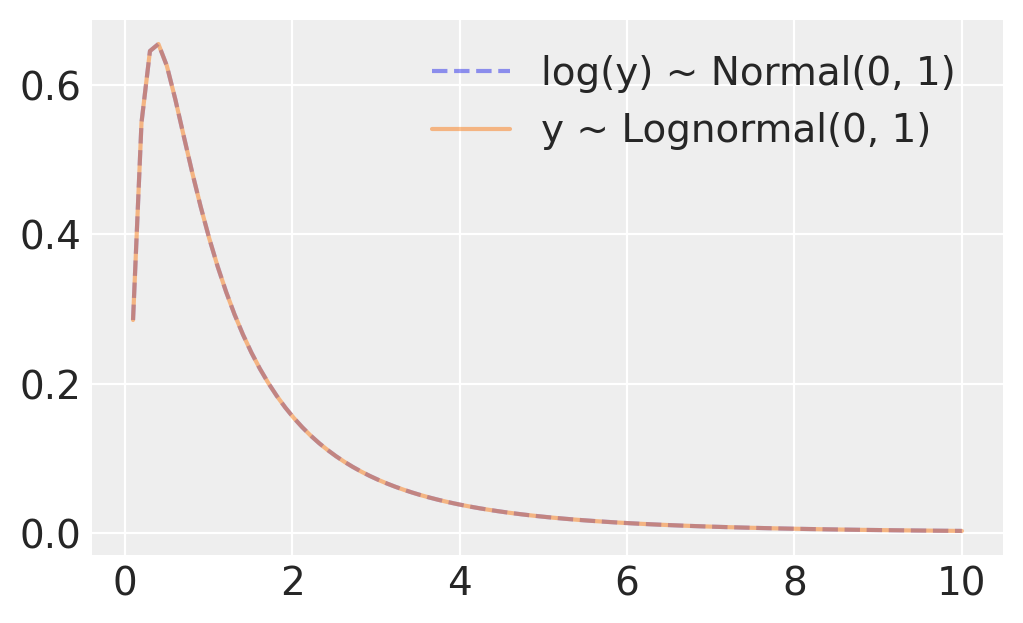

In [25]:
class Exp(tr.ElemwiseTransform):
    name = "exp"

    def backward(self, x):
        return tt.log(x)

    def forward(self, x):
        return tt.exp(x)

    def jacobian_det(self, x):
        return -tt.log(x)


with pm.Model() as model:
    x1 = pm.Normal("x1", 0.0, 1.0, transform=Exp())
    x2 = pm.Lognormal("x2", 0.0, 1.0)

lognorm1 = model.named_vars["x1_exp__"]
lognorm2 = model.named_vars["x2"]

_, ax = plt.subplots(1, 1, figsize=(5, 3))
x = np.linspace(0.0, 10.0, 100)
ax.plot(
    x,
    np.exp(lognorm1.distribution.logp(x).eval()),
    "--",
    alpha=0.5,
    label="log(y) ~ Normal(0, 1) ",
)
ax.plot(
    x,
    np.exp(lognorm2.distribution.logp(x).eval()),
    alpha=0.5,
    label="y ~ Lognormal(0, 1)",
)
plt.legend();

Notice from above that the named variable x1_exp__ in the model is Lognormal distributed.
Using similar approach, we can create ordered RVs following some distribution. For example, we can combine the ordered transformation and logodds transformation using Chain to create a 2D RV that satisfy 𝑥1,𝑥2∼Uniform(0,1) 𝑎𝑛𝑑 𝑥1<𝑥2

In [26]:
Order = tr.Ordered()
Logodd = tr.LogOdds()
chain_tran = tr.Chain([Logodd, Order])

with pm.Model() as m0:
    x = pm.Uniform("x", 0.0, 1.0, shape=2, transform=chain_tran, testval=[0.1, 0.9])
    trace = pm.sample(5000, tune=1000, progressbar=False, return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x]
Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 19 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


/var/folders/ss/354rp1g519qbr11sv_1pjpn40000gn/T/ipykernel_14972/3087786998.py:7: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


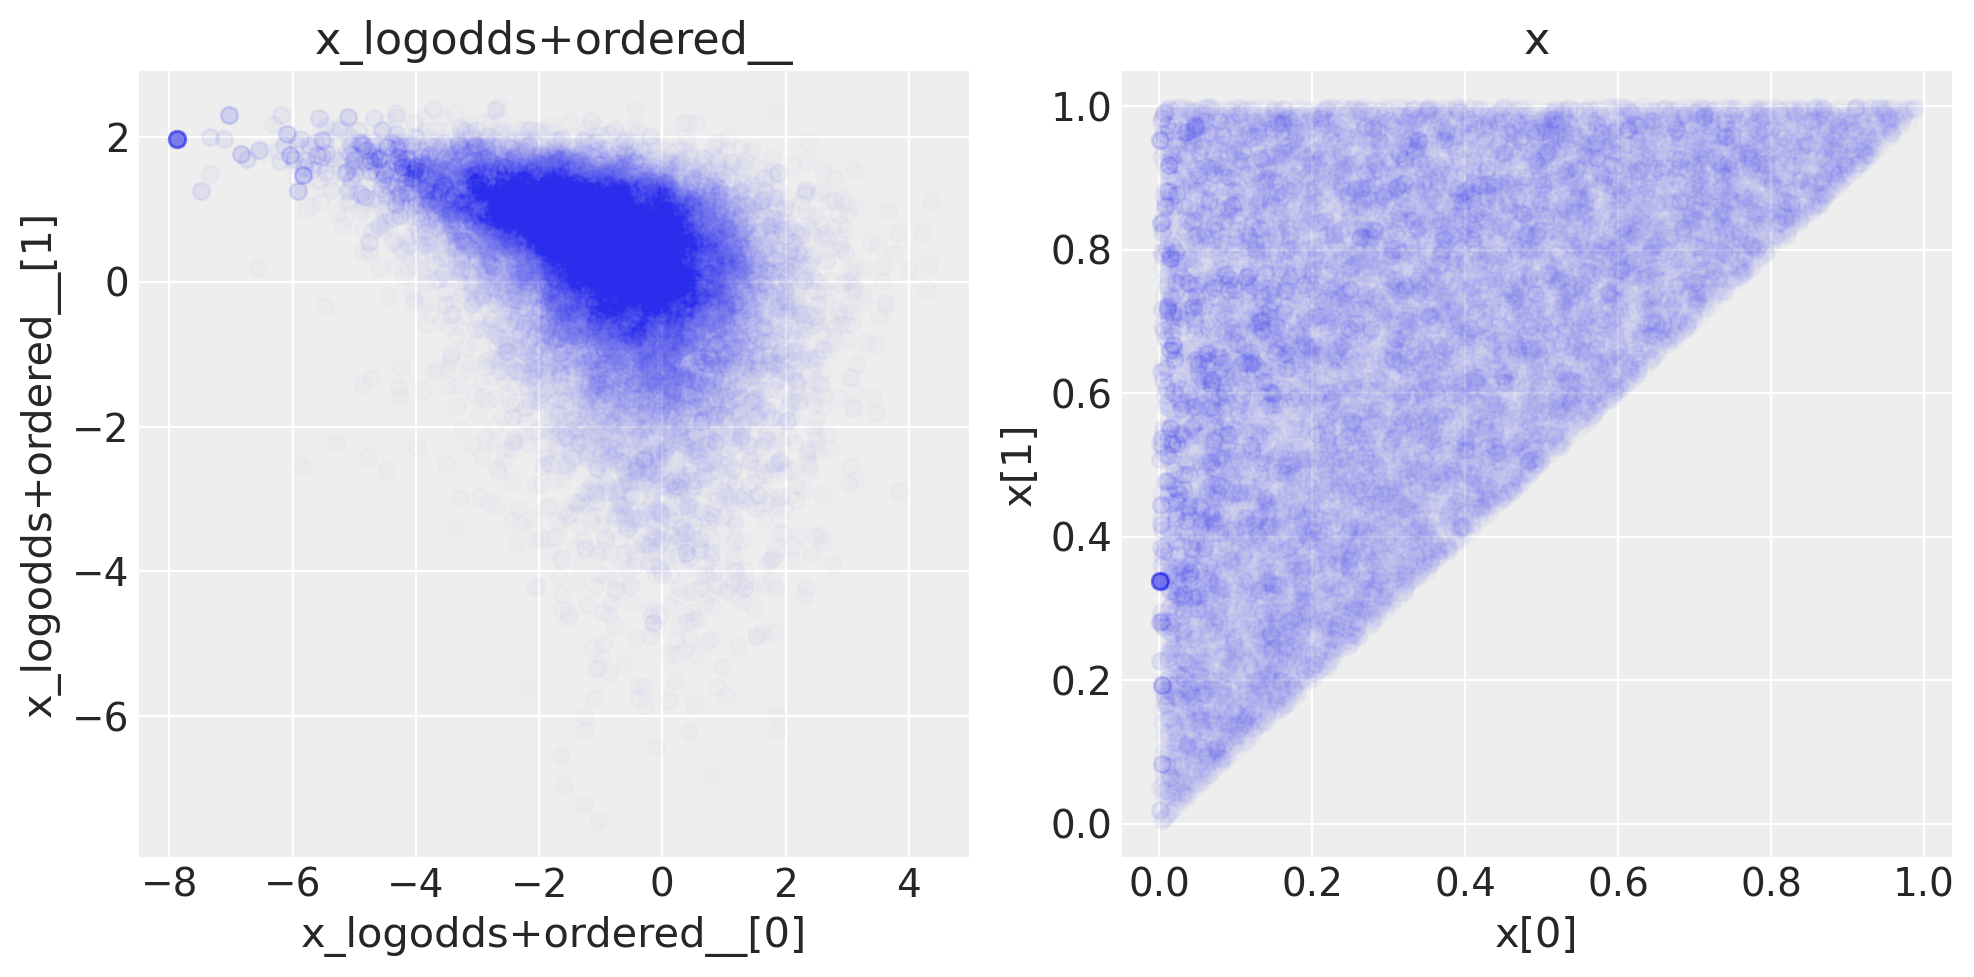

In [27]:
_, ax = plt.subplots(1, 2, figsize=(10, 5))
for ivar, varname in enumerate(trace.varnames):
    ax[ivar].scatter(trace[varname][:, 0], trace[varname][:, 1], alpha=0.01)
    ax[ivar].set_xlabel(varname + "[0]")
    ax[ivar].set_ylabel(varname + "[1]")
    ax[ivar].set_title(varname)
plt.tight_layout()

## Lists of RVs / higher-dimensional RVs

Above we have seen how to create scalar RVs. In many models, you want multiple RVs. There is a tendency (mainly inherited from PyMC 2.x) to create list of RVs, like this:

In [28]:
with pm.Model():
    # bad:
    x = [pm.Normal("x_{}".format(i), mu=0, sigma=1) for i in range(10)]

However, even though this works it is quite slow and not recommended. Instead, use the shape kwarg:



In [29]:
with pm.Model() as model:
    # good:
    x = pm.Normal("x", mu=0, sigma=1, shape=10)

x is now a random vector of length 10. We can index into it or do linear algebra operations on it:



In [30]:
with model:
    y = x[0] * x[1]  # full indexing is supported
    x.dot(x.T)  # Linear algebra is supported

# Initialization with test_values

While PyMC3 tries to automatically initialize models it is sometimes helpful to define initial values for RVs. This can be done via the testval kwarg:



In [31]:
with pm.Model():
    x = pm.Normal("x", mu=0, sigma=1, shape=5)

x.tag.test_value

array([0., 0., 0., 0., 0.])

In [32]:
with pm.Model():
    x = pm.Normal("x", mu=0, sigma=1, shape=5, testval=np.random.randn(5))

x.tag.test_value

array([ 0.47912319,  0.70462851,  0.68297991, -0.00562203,  1.00294121])

This technique is quite useful to identify problems with model specification or initialization.



# __3. Inference__


Once we have defined our model, we have to perform inference to approximate the posterior distribution. PyMC3 supports two broad classes of inference: sampling and variational inference.



## 3.1 Sampling


The main entry point to MCMC sampling algorithms is via the pm.sample() function. By default, this function tries to auto-assign the right sampler(s) and auto-initialize if you don’t pass anything.

With PyMC3 version >=3.9 the return_inferencedata=True kwarg makes the sample function return an arviz.InferenceData object instead of a MultiTrace. InferenceData has many advantages, compared to a MultiTrace: For example it can be saved/loaded from a file, and can also carry additional (meta)data such as date/version, or posterior predictive distributions. Take a look at the ArviZ Quickstart to learn more.

In [33]:
############### Insert ArviZ quickstart here ###############

In [34]:
with pm.Model() as model:
    mu = pm.Normal("mu", mu=0, sigma=1)
    obs = pm.Normal("obs", mu=mu, sigma=1, observed=np.random.randn(100))

    idata = pm.sample(2000, tune=1500, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


Sampling 4 chains for 1_500 tune and 2_000 draw iterations (6_000 + 8_000 draws total) took 12 seconds.


As you can see, on a continuous model, PyMC3 assigns the NUTS sampler, which is very efficient even for complex models. PyMC3 also runs tuning to find good starting parameters for the sampler. Here we draw 2000 samples from the posterior in each chain and allow the sampler to adjust its parameters in an additional 1500 iterations. If not set via the cores kwarg, the number of chains is determined from the number of available CPU cores.

In [35]:
idata.posterior.dims

Frozen({'chain': 4, 'draw': 2000})

The tuning samples are discarded by default. With discard_tuned_samples=False they can be kept and end up in a special property of the InferenceData object.

You can also run multiple chains in parallel using the chains and cores kwargs:

In [36]:
with pm.Model() as model:
    mu = pm.Normal("mu", mu=0, sigma=1)
    obs = pm.Normal("obs", mu=mu, sigma=1, observed=np.random.randn(100))

    idata = pm.sample(cores=4, chains=6, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (6 chains in 4 jobs)
NUTS: [mu]


Sampling 6 chains for 1_000 tune and 1_000 draw iterations (6_000 + 6_000 draws total) took 16 seconds.


In [37]:
idata.posterior["mu"].shape


(6, 1000)

In [38]:
# get values of a single chain
idata.posterior["mu"].sel(chain=1).shape

(1000,)

PyMC3, offers a variety of other samplers, found in pm.step_methods.



In [39]:
list(filter(lambda x: x[0].isupper(), dir(pm.step_methods)))

['BinaryGibbsMetropolis',
 'BinaryMetropolis',
 'CategoricalGibbsMetropolis',
 'CauchyProposal',
 'CompoundStep',
 'DEMetropolis',
 'DEMetropolisZ',
 'DEMetropolisZMLDA',
 'ElemwiseCategorical',
 'EllipticalSlice',
 'HamiltonianMC',
 'LaplaceProposal',
 'MLDA',
 'Metropolis',
 'MetropolisMLDA',
 'MultivariateNormalProposal',
 'NUTS',
 'NormalProposal',
 'PGBART',
 'PoissonProposal',
 'RecursiveDAProposal',
 'Slice',
 'UniformProposal']

Commonly used step-methods besides NUTS are Metropolis and Slice. For almost all continuous models, ``NUTS`` should be preferred. There are hard-to-sample models for which NUTS will be very slow causing many users to use Metropolis instead. This practice, however, is rarely successful. NUTS is fast on simple models but can be slow if the model is very complex or it is badly initialized. In the case of a complex model that is hard for NUTS, Metropolis, while faster, will have a very low effective sample size or not converge properly at all. A better approach is to instead try to improve initialization of NUTS, or reparameterize the model.

## What is Markov Chain Monte Carlo (MCMC) sampling?

## Markov Chain

A mathematical system that:

   *  moves from one state to another
   * mandates that the probability of each event depends only on the previous event

## [Markov Chain visualization](https://setosa.io/ev/markov-chains/)

## Markov Chain Monte Carlo

A class of algorithms that:

   * sample from a probability distribution
   * approach closer to the desired distribution as each additional sample draw
   * "Random walk" through probability space with threshold for sample acceptance

## [MCMC visualization](https://chi-feng.github.io/mcmc-demo/app.html?algorithm=RandomWalkMH&target=banana)

For completeness, other sampling methods can be passed to sample:

In [40]:
with pm.Model() as model:
    mu = pm.Normal("mu", mu=0, sigma=1)
    obs = pm.Normal("obs", mu=mu, sigma=1, observed=np.random.randn(100))

    step = pm.Metropolis()
    trace = pm.sample(1000, step=step)

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.
The number of effective samples is smaller than 25% for some parameters.


You can also assign variables to different step methods.



In [41]:
with pm.Model() as model:
    mu = pm.Normal("mu", mu=0, sigma=1)
    sd = pm.HalfNormal("sd", sigma=1)
    obs = pm.Normal("obs", mu=mu, sigma=sd, observed=np.random.randn(100))

    step1 = pm.Metropolis(vars=[mu])
    step2 = pm.Slice(vars=[sd])
    idata = pm.sample(10000, step=[step1, step2], cores=4, return_inferencedata=True)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [mu]
>Slice: [sd]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 17 seconds.
The number of effective samples is smaller than 25% for some parameters.


# 3.2 Analyze sampling results¶


The most common used plot to analyze sampling results is the so-called trace-plot:



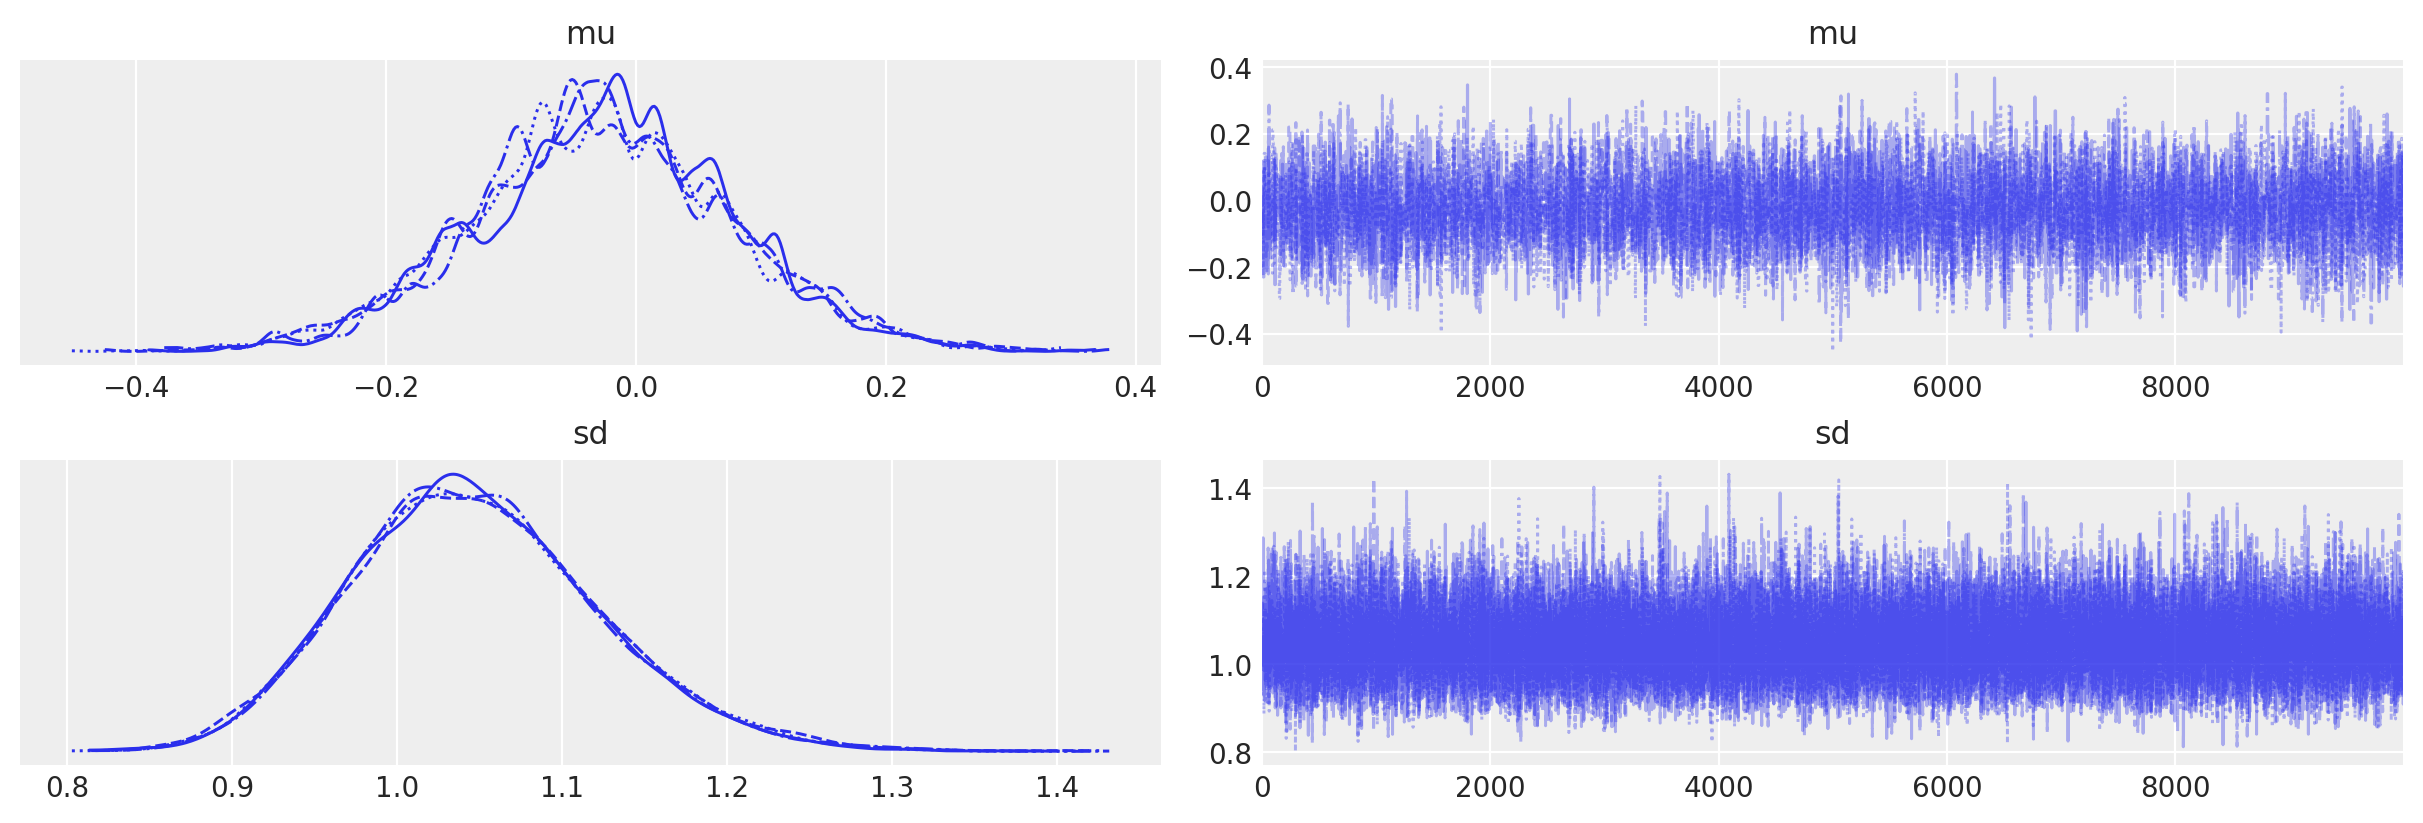

In [42]:
az.plot_trace(idata);

Another common metric to look at is R-hat, also known as the Gelman-Rubin statistic:

In [43]:
az.summary(idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,-0.026,0.104,-0.224,0.168,0.001,0.001,6168.0,6160.0,1.0
sd,1.047,0.075,0.911,1.191,0.000,0.000,36751.0,28836.0,1.0


These are also part of the forestplot:



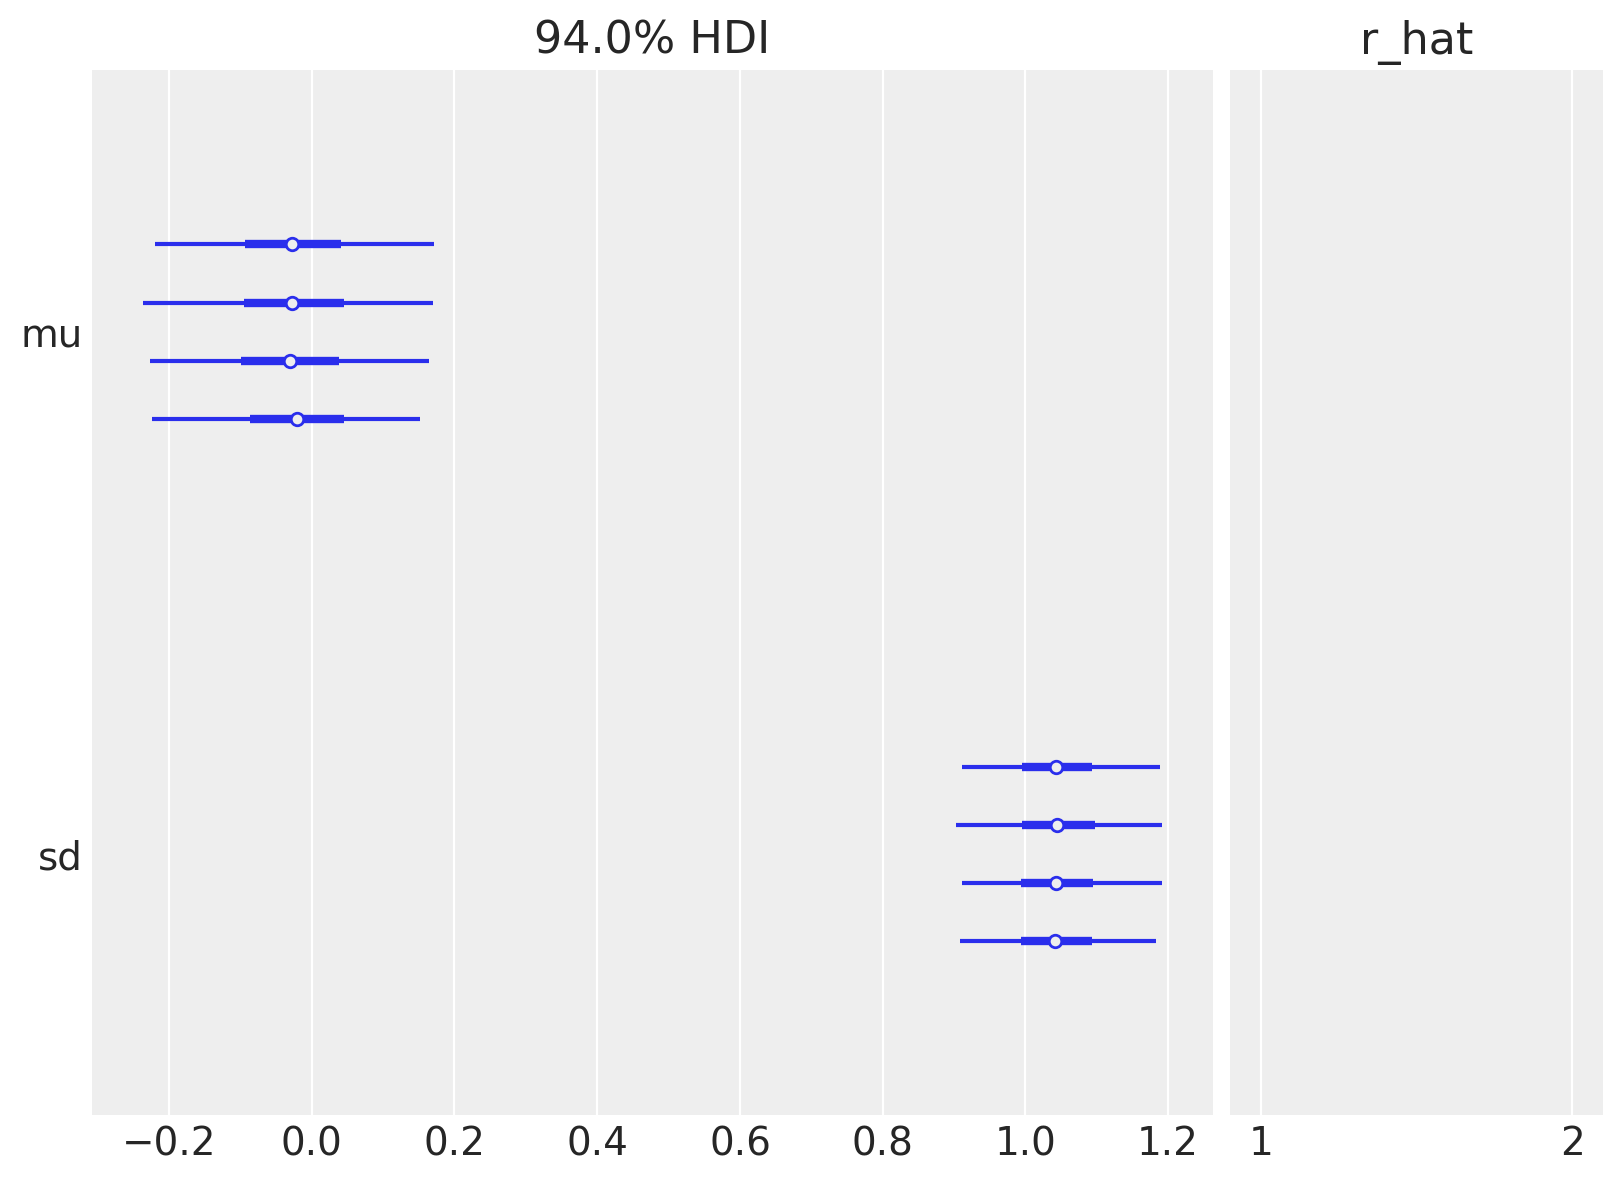

In [44]:
az.plot_forest(idata, r_hat=True);


Finally, for a plot of the posterior that is inspired by the book Doing Bayesian Data Analysis, you can use the:



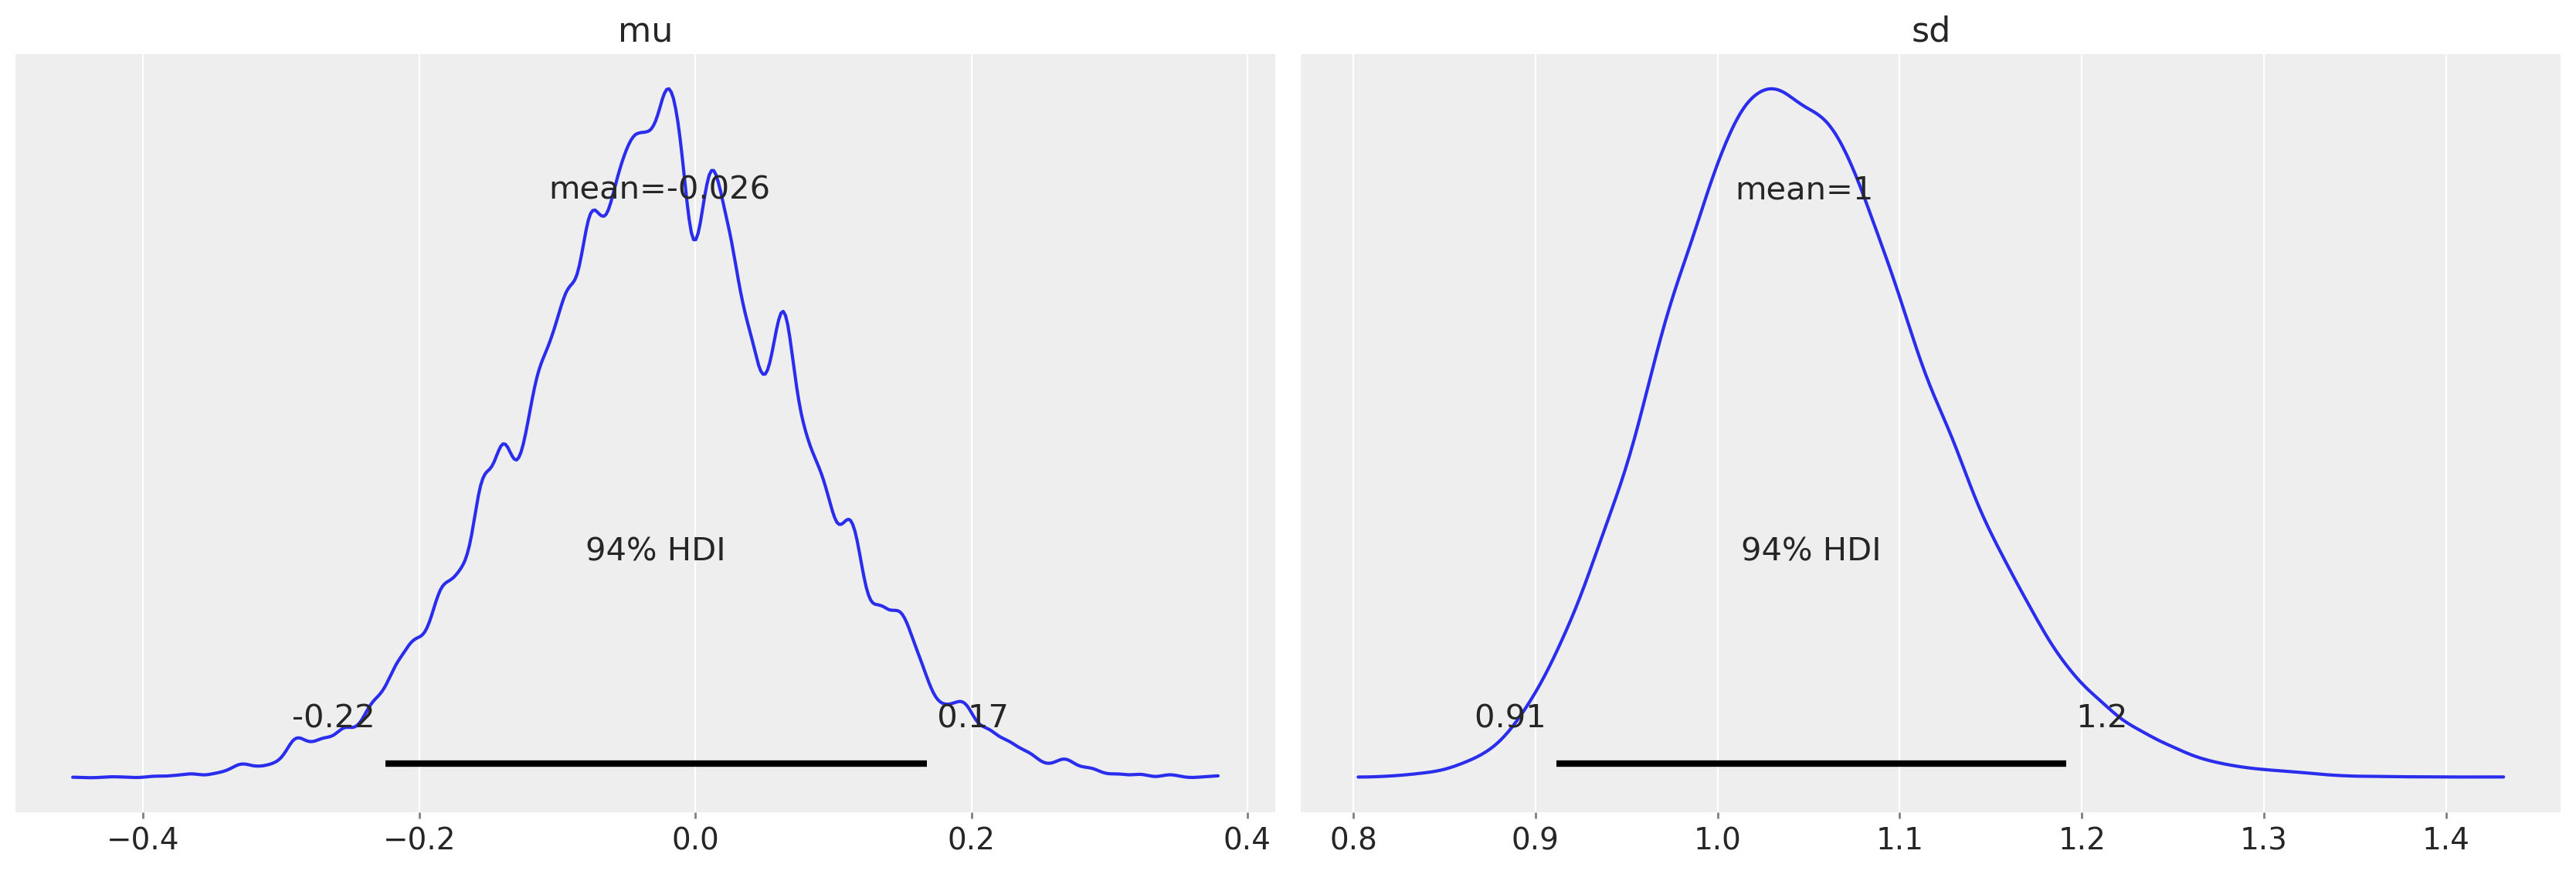

In [45]:
az.plot_posterior(idata);


For high-dimensional models it becomes cumbersome to look at all parameter’s traces. When using NUTS we can look at the energy plot to assess problems of convergence:

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.


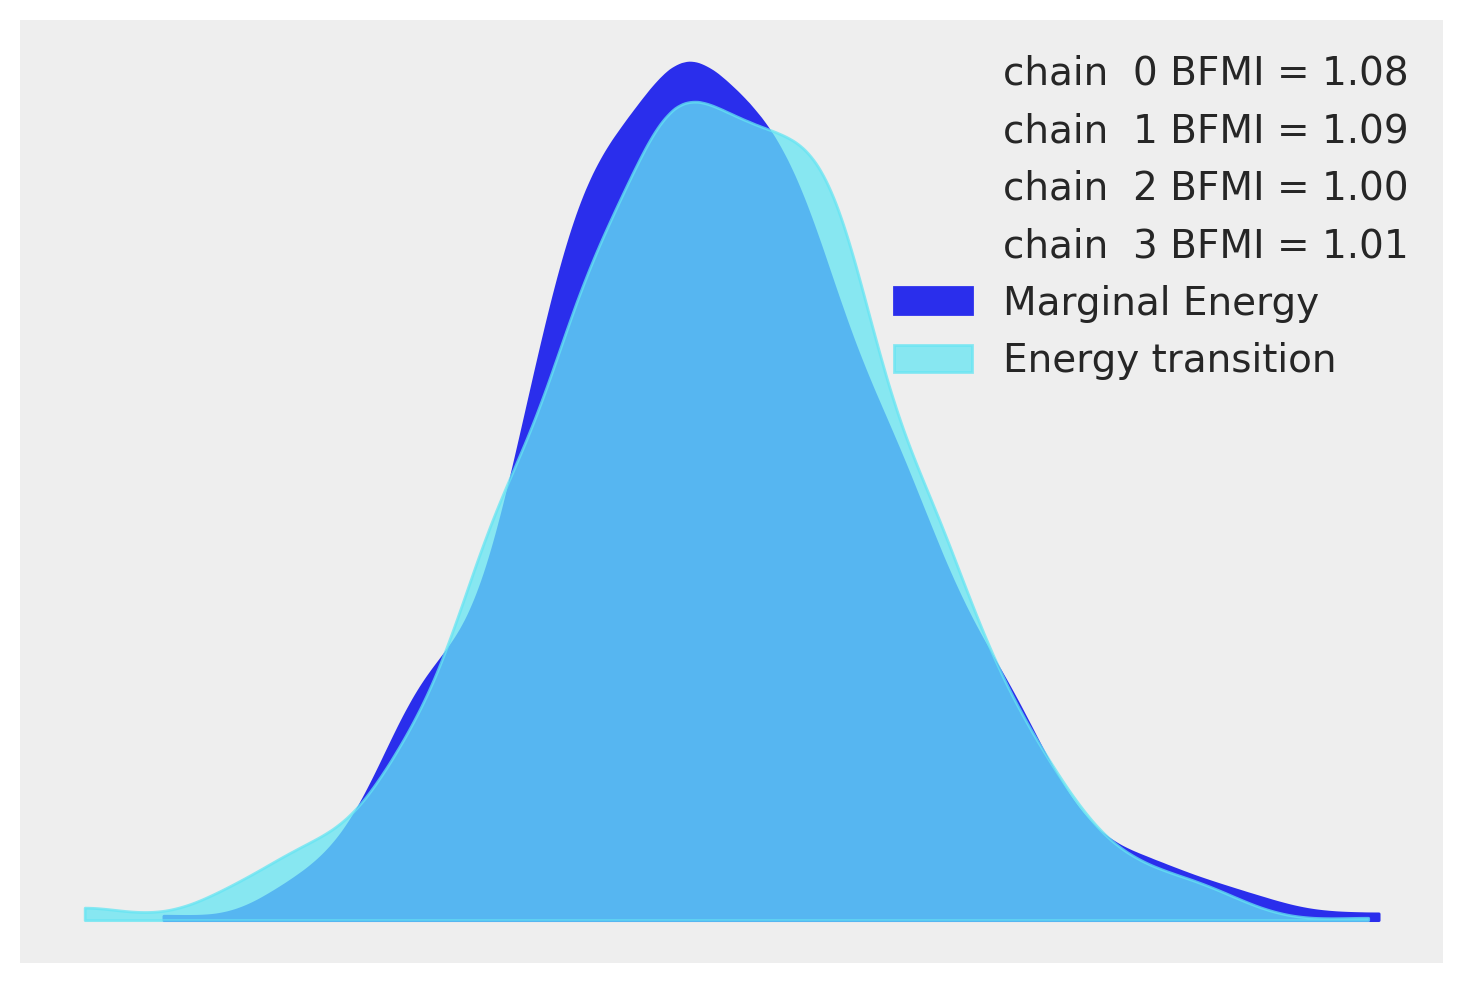

In [46]:
with pm.Model() as model:
    x = pm.Normal("x", mu=0, sigma=1, shape=100)
    idata = pm.sample(cores=4, return_inferencedata=True)

az.plot_energy(idata);

For more information on sampler stats and the energy plot, see [here](https://docs.pymc.io/notebooks/sampler-stats.html). 

For more information on identifying sampling problems and what to do about them, see [here](https://docs.pymc.io/notebooks/Diagnosing_biased_Inference_with_Divergences.html).

# 3.3 Variational inference¶


PyMC3 supports various Variational Inference techniques. While these methods are much faster, they are often also less accurate and can lead to biased inference. The main entry point is pymc3.fit().

In [47]:
with pm.Model() as model:
    mu = pm.Normal("mu", mu=0, sigma=1)
    sd = pm.HalfNormal("sd", sigma=1)
    obs = pm.Normal("obs", mu=mu, sigma=sd, observed=np.random.randn(100))

    approx = pm.fit()

Finished [100%]: Average Loss = 148.05


The returned Approximation object has various capabilities, like drawing samples from the approximated posterior, which we can analyse like a regular sampling run:

In [48]:
approx.sample(500)

<MultiTrace: 1 chains, 500 iterations, 3 variables>

The variational submodule offers a lot of flexibility in which VI to use and follows an object oriented design. For example, full-rank ADVI estimates a full covariance matrix:

In [49]:
mu = pm.floatX([0.0, 0.0])
cov = pm.floatX([[1, 0.5], [0.5, 1.0]])
with pm.Model() as model:
    pm.MvNormal("x", mu=mu, cov=cov, shape=2)
    approx = pm.fit(method="fullrank_advi")

Finished [100%]: Average Loss = 0.0065707


An equivalent expression using the object-oriented interface is:

In [50]:
with pm.Model() as model:
    pm.MvNormal("x", mu=mu, cov=cov, shape=2)
    approx = pm.FullRankADVI().fit()

Finished [100%]: Average Loss = 0.011343


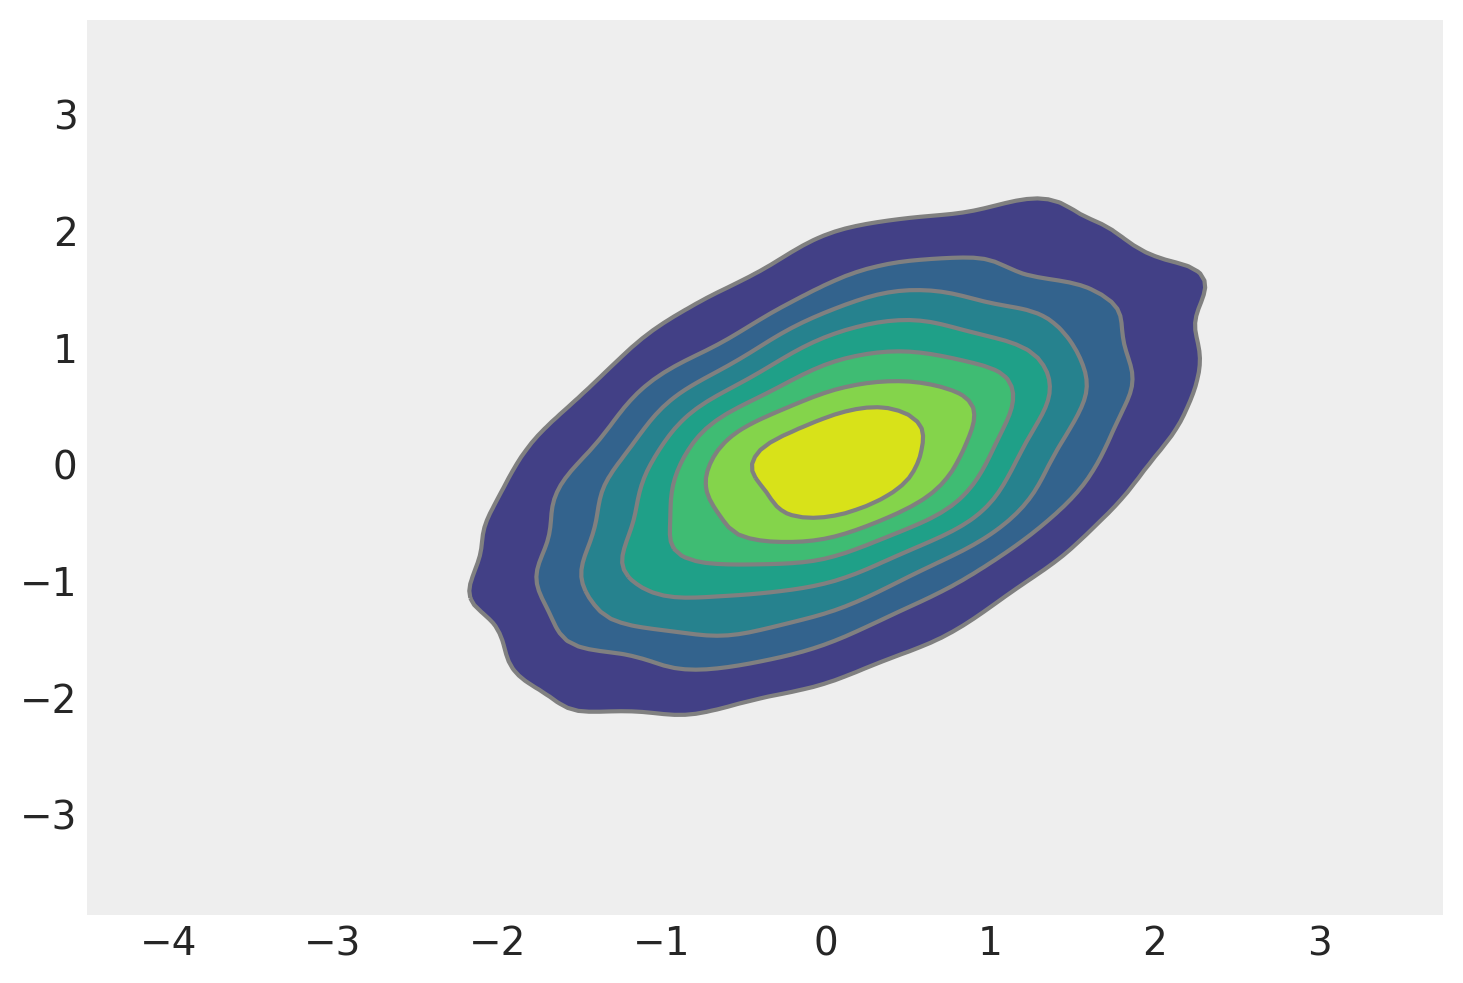

In [51]:
plt.figure()
trace = approx.sample(10000)
az.plot_kde(trace["x"][:, 0], trace["x"][:, 1]);

Stein Variational Gradient Descent (SVGD) uses particles to estimate the posterior:



In [52]:
w = pm.floatX([0.2, 0.8])
mu = pm.floatX([-0.3, 0.5])
sd = pm.floatX([0.1, 0.1])
with pm.Model() as model:
    pm.NormalMixture("x", w=w, mu=mu, sigma=sd)
    approx = pm.fit(method=pm.SVGD(n_particles=200, jitter=1.0))

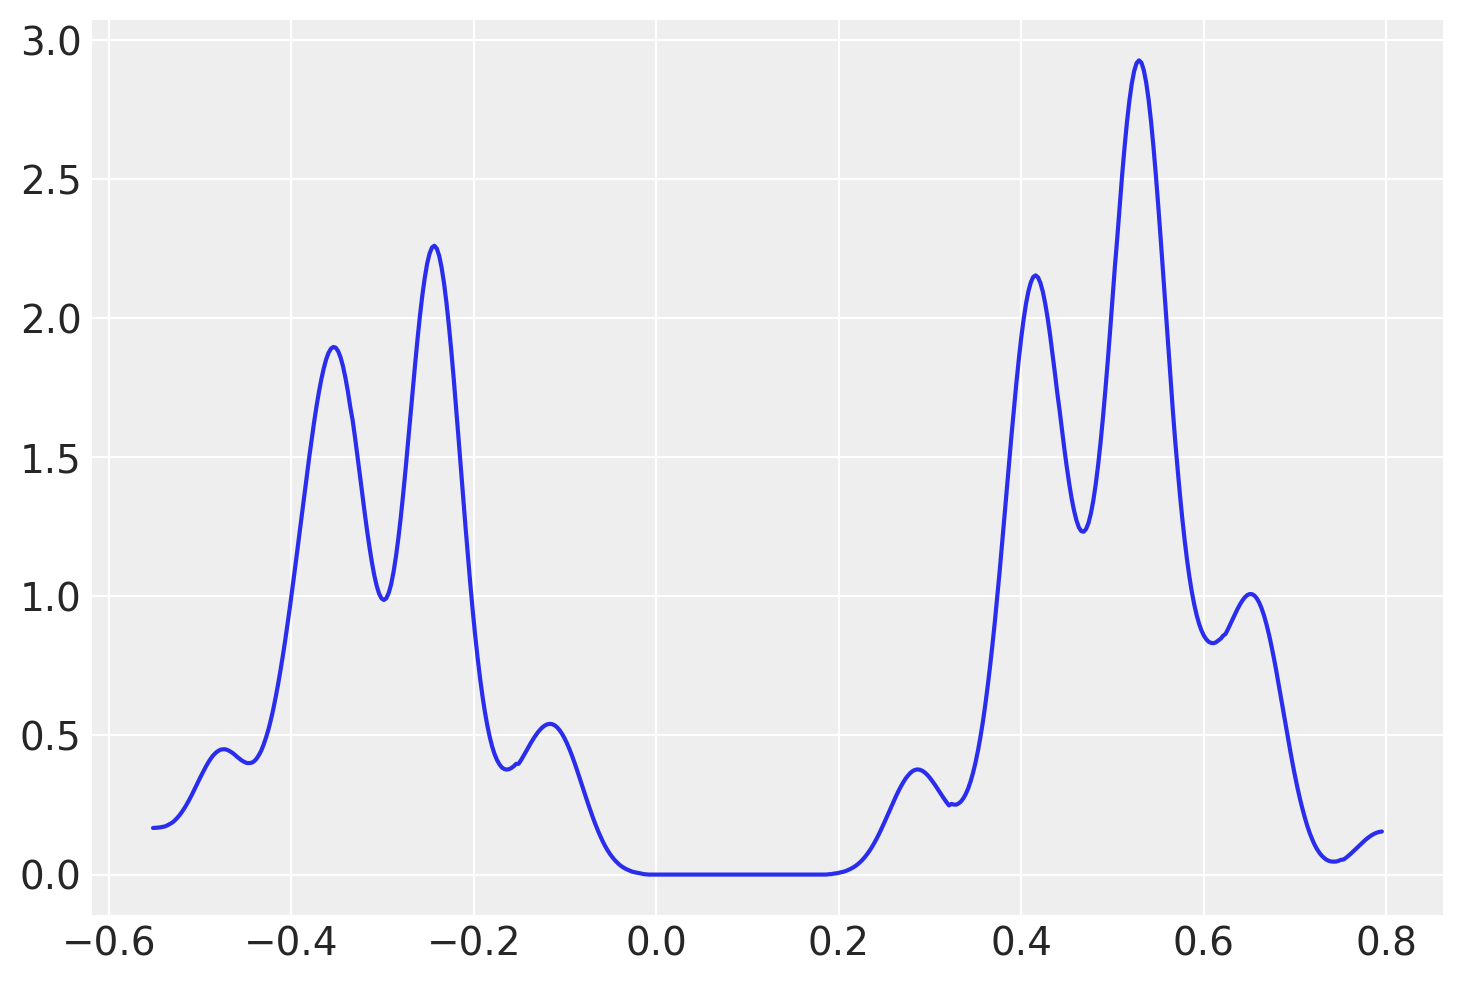

In [53]:
plt.figure()
trace = approx.sample(10000)
az.plot_dist(trace["x"]);

# 4. Posterior Predictive Sampling


The sample_posterior_predictive() function performs prediction on hold-out data and posterior predictive checks.



In [54]:
data = np.random.randn(100)
with pm.Model() as model:
    mu = pm.Normal("mu", mu=0, sigma=1)
    sd = pm.HalfNormal("sd", sigma=1)
    obs = pm.Normal("obs", mu=mu, sigma=sd, observed=data)

    idata = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.


In [55]:
with model:
    post_pred = pm.sample_posterior_predictive(idata.posterior)
# add posterior predictive to the InferenceData
az.concat(idata, az.from_pymc3(posterior_predictive=post_pred), inplace=True)

Got error No model on context stack. trying to find log_likelihood in translation.


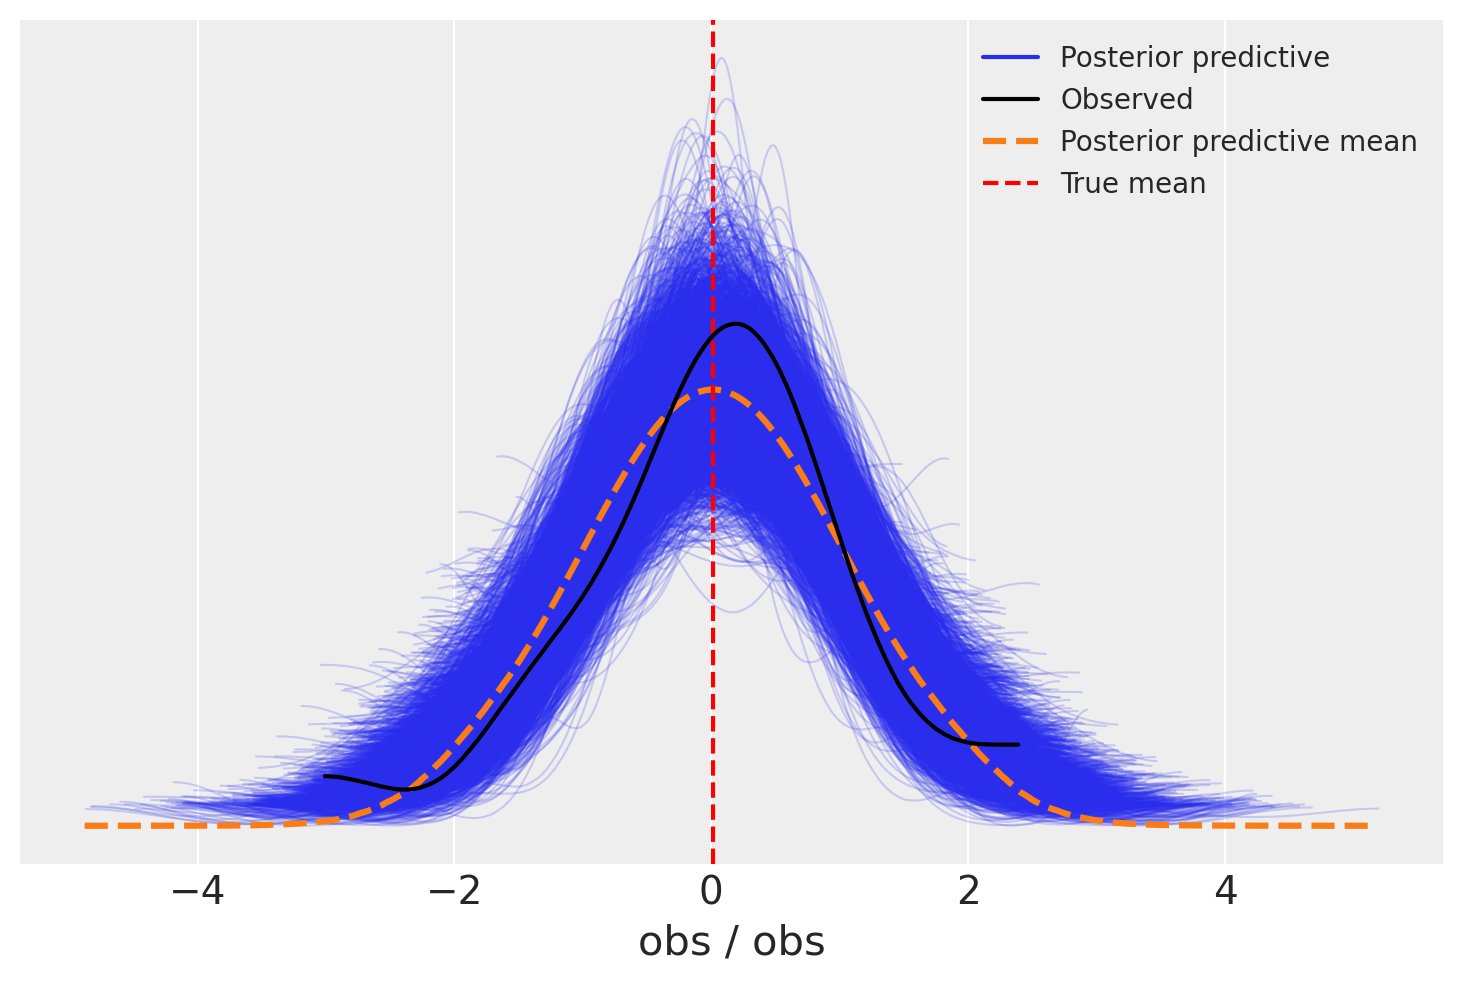

In [56]:
fig, ax = plt.subplots()
az.plot_ppc(idata, ax=ax)
ax.axvline(data.mean(), ls="--", color="r", label="True mean")
ax.legend(fontsize=10);

# 4.1 Predicting on hold-out data

In many cases you want to predict on unseen / hold-out data. This is especially relevant in __Probabilistic Machine Learning__ and __Bayesian Deep Learning__. PyMC3 recently improved the API in this regard with the pm.Data container, which is a wrapper around a theano.shared variable whose values can be changed later. 

Otherwise they can be passed into PyMC3 just like any other numpy array or tensor.

This distinction is significant since internally all models in PyMC3 are giant symbolic expressions. 

When you pass data directly into a model, you are giving Theano permission to treat this data as a constant and optimize it away as it sees fit. If you need to change this data later you might not have a way to point at it in the symbolic expression. Using theano.shared offers a way to point to a place in that symbolic expression, and change what is there.

In [57]:
x = np.random.randn(100)
y = x > 0

with pm.Model() as model:
    # create shared variables that can be changed later on
    x_shared = pm.Data("x_obs", x)
    y_shared = pm.Data("y_obs", y)

    coeff = pm.Normal("x", mu=0, sigma=1)
    logistic = pm.math.sigmoid(coeff * x_shared)
    pm.Bernoulli("obs", p=logistic, observed=y_shared)
    idata = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.


Now assume we want to predict on unseen data. For this we have to change the values of x_shared and y_shared. Theoretically we don’t need to set y_shared as we want to predict it but it has to match the shape of x_shared.

In [58]:
with model:
    # change the value and shape of the data
    pm.set_data({
        "x_obs": [-1, 0, 1.0],
        # use dummy values with the same shape:
        "y_obs": [0, 0, 0],
    })

    post_pred = pm.sample_posterior_predictive(idata.posterior)

In [59]:
post_pred["obs"].mean(axis=0)

array([0.0265 , 0.49225, 0.97225])

In [60]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Wed Oct 27 2021

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.28.0

arviz     : 0.11.4
pymc3     : 3.11.4
theano    : 1.1.2
numpy     : 1.21.3
matplotlib: 3.4.3

Watermark: 2.2.0



<img src="pics/antarctica.jpg" alt="Drawing" style="width: 700px"  align='right'>
<h1><center>Thanks very much! </center></h1>
<h1><center>Questions?  </center></h1>
<h3><center> rcc2167@columbia.edu </center></h3>

    
